<a href="https://colab.research.google.com/github/rymarinelli/Fire-Fly/blob/main/VIT_Works.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 12.5 MB/s 


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import glob, warnings
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

warnings.filterwarnings('ignore')
print('TensorFlow Version ' + tf.__version__)

TensorFlow Version 2.7.0


In [3]:
!unzip Training.zip
!unzip Test.zip

Archive:  Training.zip
  inflating: Training/fire000.png    
  inflating: Training/fire001.png    
  inflating: Training/fire002.png    
  inflating: Training/fire003.png    
  inflating: Training/fire004.png    
  inflating: Training/fire005.png    
  inflating: Training/fire006.png    
  inflating: Training/fire007.png    
  inflating: Training/fire008.png    
  inflating: Training/fire009.png    
  inflating: Training/fire010.png    
  inflating: Training/fire011.png    
  inflating: Training/fire012.png    
  inflating: Training/fire013.png    
  inflating: Training/fire014.png    
  inflating: Training/fire015.png    
  inflating: Training/fire016.png    
  inflating: Training/fire017.png    
  inflating: Training/fire018.png    
  inflating: Training/fire019.png    
  inflating: Training/fire020.png    
  inflating: Training/fire021.png    
  inflating: Training/fire022.png    
  inflating: Training/fire023.png    
  inflating: Training/fire024.png    
  inflating: Training/fire0

In [4]:
import os 
file_list = list()
label_list = list()
for i in os.listdir('/content/Training'):
  file_list.append(i)
  if('not' in i) == True:
    label_list.append(0)
  else:
    label_list.append(1)

In [5]:
TRAIN_PATH = '/content/Training'
TEST_PATH = '/content/Test'

In [6]:
IMAGE_SIZE = 224
BATCH_SIZE = 16
EPOCHS = 300
DF_TRAIN = pd.DataFrame(list(zip(file_list, label_list)),
               columns =['image_id',	'label'], dtype='str')

In [7]:
TEST_IMAGES = glob.glob(TEST_PATH + '/*.png')
DF_TEST = pd.DataFrame(TEST_IMAGES, columns = ['image_path'])

classes = {0 : "no_fire",
           1 : "fire",
           }

In [8]:
def data_augment(image):
    p_spatial = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_rotate = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_pixel_1 = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_pixel_2 = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_pixel_3 = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    
    # Flips
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    
    if p_spatial > .75:
        image = tf.image.transpose(image)
        
    # Rotates
    if p_rotate > .75:
        image = tf.image.rot90(image, k = 3) # rotate 270º
    elif p_rotate > .5:
        image = tf.image.rot90(image, k = 2) # rotate 180º
    elif p_rotate > .25:
        image = tf.image.rot90(image, k = 1) # rotate 90º
        
    # Pixel-level transforms
    if p_pixel_1 >= .4:
        image = tf.image.random_saturation(image, lower = .7, upper = 1.3)
    if p_pixel_2 >= .4:
        image = tf.image.random_contrast(image, lower = .8, upper = 1.2)
    if p_pixel_3 >= .4:
        image = tf.image.random_brightness(image, max_delta = .1)
        
    return image

In [9]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                          samplewise_center = True,
                                                          samplewise_std_normalization = True,
                                                          validation_split = 0.2,
                                                          preprocessing_function = data_augment)

train_gen = datagen.flow_from_dataframe(dataframe = DF_TRAIN,
                                        directory = TRAIN_PATH,
                                        x_col = 'image_id',
                                        y_col = 'label',
                                        subset = 'training',
                                        batch_size = BATCH_SIZE,
                                        seed = 1,
                                        color_mode = 'rgb',
                                        shuffle = True,
                                        class_mode = 'categorical',
                                        target_size = (IMAGE_SIZE, IMAGE_SIZE))

valid_gen = datagen.flow_from_dataframe(dataframe = DF_TRAIN,
                                        directory = TRAIN_PATH,
                                        x_col = 'image_id',
                                        y_col = 'label',
                                        subset = 'validation',
                                        batch_size = BATCH_SIZE,
                                        seed = 1,
                                        color_mode = 'rgb',
                                        shuffle = False,
                                        class_mode = 'categorical',
                                        target_size = (IMAGE_SIZE, IMAGE_SIZE))

test_gen = datagen.flow_from_dataframe(dataframe = DF_TEST,
                                       x_col = 'image_path',
                                       y_col = None,
                                       batch_size = BATCH_SIZE,
                                       seed = 1,
                                       color_mode = 'rgb',
                                       shuffle = False,
                                       class_mode = None,
                                       target_size = (IMAGE_SIZE, IMAGE_SIZE))

Found 144 validated image filenames belonging to 2 classes.
Found 36 validated image filenames belonging to 2 classes.
Found 46 validated image filenames.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

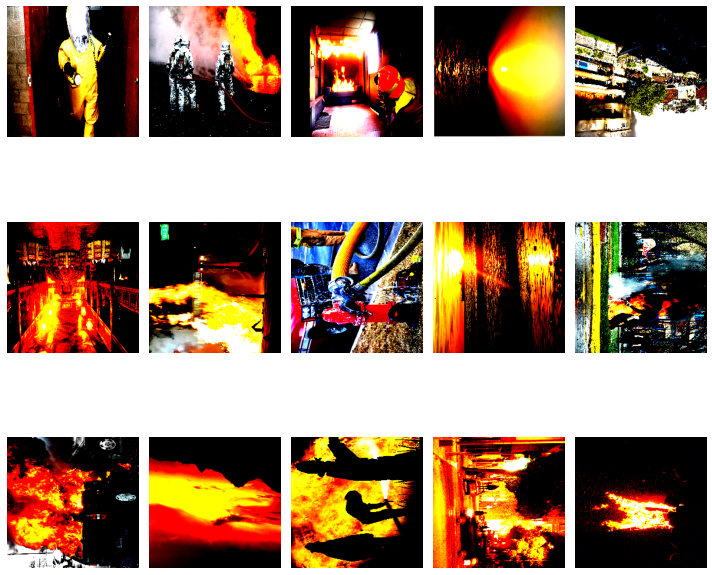

In [10]:
images = [train_gen[0][0][i] for i in range(16)]
fig, axes = plt.subplots(3, 5, figsize = (10, 10))

axes = axes.flatten()

for img, ax in zip(images, axes):
    ax.imshow(img.reshape(IMAGE_SIZE, IMAGE_SIZE, 3))
    ax.axis('off')

plt.tight_layout()
plt.show()

In [11]:
!pip install --quiet vit-keras

from vit_keras import vit

In [12]:
vit_model = vit.vit_b32(
        image_size = IMAGE_SIZE,
        activation = 'softmax',
        pretrained = True,
        include_top = False,
        pretrained_top = False,
        classes = 2)

353263616/353253686 [==============================] - 26s 0us/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


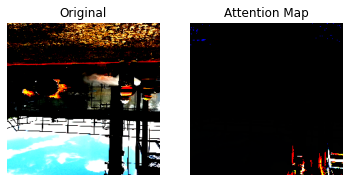

In [13]:
from vit_keras import visualize

x = test_gen.next()
image = x[0]

attention_map = visualize.attention_map(model = vit_model, image = image)

# Plot results
fig, (ax1, ax2) = plt.subplots(ncols = 2)
ax1.axis('off')
ax2.axis('off')
ax1.set_title('Original')
ax2.set_title('Attention Map')
_ = ax1.imshow(image)
_ = ax2.imshow(attention_map)

In [14]:
model = tf.keras.Sequential([
        vit_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(11, activation = tfa.activations.gelu),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(2, 'softmax')
    ],
    name = 'vision_transformer')

model.summary()

Model: "vision_transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vit-b32 (Functional)        (None, 768)               87455232  
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 batch_normalization (BatchN  (None, 768)              3072      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 11)                8459      
                                                                 
 batch_normalization_1 (Batc  (None, 11)               44        
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 2)          

In [15]:
learning_rate = 1e-4

optimizer = tfa.optimizers.RectifiedAdam(learning_rate = learning_rate)

model.compile(optimizer = optimizer, 
              loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.2), 
              metrics = ['accuracy'])

STEP_SIZE_TRAIN = train_gen.n // train_gen.batch_size
STEP_SIZE_VALID = valid_gen.n // valid_gen.batch_size

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'accuracy',
                                                 factor = 0.2,
                                                 patience = 2,
                                                 verbose = 1,
                                                 min_delta = 1e-4,
                                                 min_lr = 1e-6,
                                                 mode = 'max')

earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy',
                                                 min_delta = 1e-4,
                                                 patience = 5,
                                                 mode = 'max',
                                                 restore_best_weights = True,
                                                 verbose = 1)

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = './model.hdf5',
                                                  monitor = 'accuracy', 
                                                  verbose = 1, 
                                                  save_best_only = True,
                                                  save_weights_only = True,
                                                  mode = 'max')

callbacks = [earlystopping, reduce_lr, checkpointer]

In [16]:
model.fit(x = train_gen,
          steps_per_epoch = STEP_SIZE_TRAIN,
          validation_data = valid_gen,
          validation_steps = STEP_SIZE_VALID,
          epochs = EPOCHS,
          callbacks = callbacks)

Epoch 1/300
9/9 [==============================] - ETA: 0s - loss: 1.0023 - accuracy: 0.5694
Epoch 00001: accuracy improved from -inf to 0.56944, saving model to ./model.hdf5
9/9 [==============================] - 55s 1s/step - loss: 1.0023 - accuracy: 0.5694 - val_loss: 1.1934 - val_accuracy: 0.5312 - lr: 1.0000e-04
Epoch 2/300
9/9 [==============================] - ETA: 0s - loss: 0.8272 - accuracy: 0.5486
Epoch 00002: accuracy did not improve from 0.56944
9/9 [==============================] - 7s 789ms/step - loss: 0.8272 - accuracy: 0.5486 - val_loss: 1.4126 - val_accuracy: 0.4375 - lr: 1.0000e-04
Epoch 3/300
9/9 [==============================] - ETA: 0s - loss: 0.7726 - accuracy: 0.6250
Epoch 00003: accuracy improved from 0.56944 to 0.62500, saving model to ./model.hdf5
9/9 [==============================] - 8s 954ms/step - loss: 0.7726 - accuracy: 0.6250 - val_loss: 1.2616 - val_accuracy: 0.4062 - lr: 1.0000e-04
Epoch 4/300
9/9 [==============================] - ETA: 0s - loss: 

              precision    recall  f1-score   support

           0       1.00      0.61      0.76        23
           1       0.59      1.00      0.74        13

    accuracy                           0.75        36
   macro avg       0.80      0.80      0.75        36
weighted avg       0.85      0.75      0.75        36



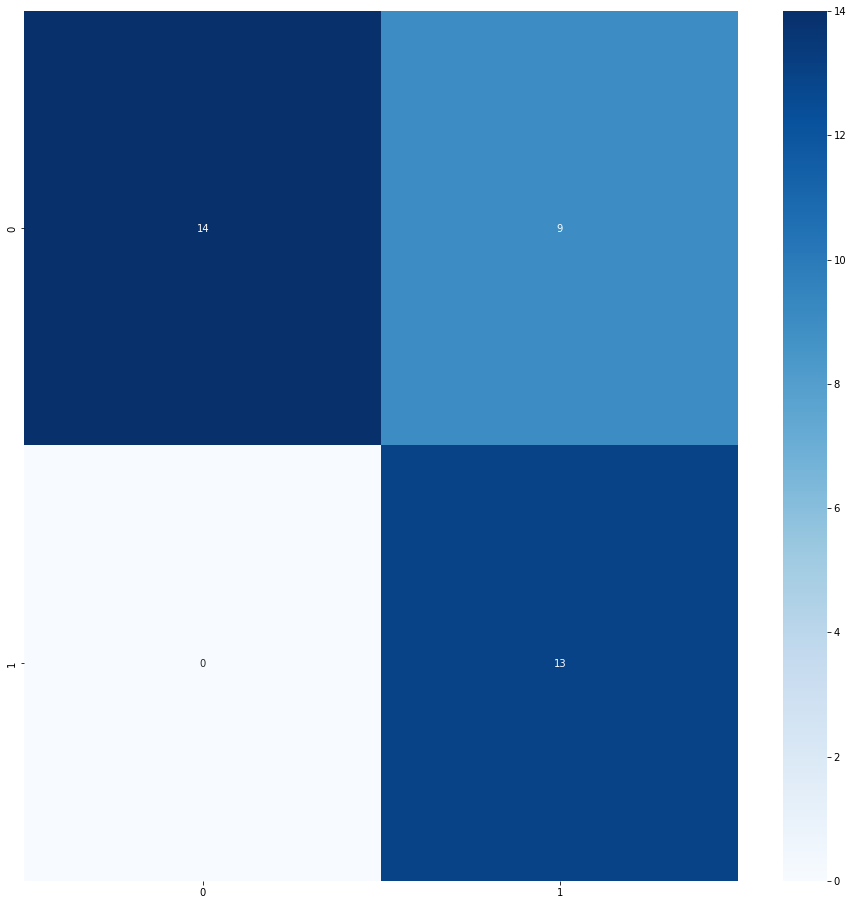

In [17]:
predicted_classes = np.argmax(model.predict(valid_gen, steps = valid_gen.n // valid_gen.batch_size + 1), axis = 1)
true_classes = valid_gen.classes
class_labels = list(valid_gen.class_indices.keys())  

confusionmatrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize = (16, 16))
sns.heatmap(confusionmatrix, cmap = 'Blues', annot = True, cbar = True)

print(classification_report(true_classes, predicted_classes))

In [21]:
model.save('/content/BowFire_Transformer.h5')

In [19]:
import keras
model = keras.models.load_model('/content/BowFire_Transformer.h5')


In [25]:
predicted_classes

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0])

In [27]:
for i in os.listdir('/content/Training'):
  img = image.load_img('/content/Training/' + i, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)
  print(model.predict(img_array)[0][0])

0.88555086
0.7604153
0.8865456
0.85199046
0.9314224
0.9540736
0.8758659
0.9002066
0.9156802
0.8950877
0.90220875
0.9509921
0.93448234
0.7387742
0.96468675
0.89806086
0.91056633
0.96784043
0.849049
0.79883796
0.8459272
0.8673979
0.86003894
0.73232555
0.77692366
0.7864341
0.9504296
0.9676582
0.9098351
0.9067778
0.855277
0.8656563
0.923707
0.93837386
0.9341218
0.92002463
0.9540293
0.9195176
0.91938806
0.9424684
0.93211156
0.8296329
0.8886606
0.9177629
0.8553512
0.95186293
0.92270976
0.84652495
0.96406907
0.7464268
0.8847859
0.96665823
0.91309386
0.92622685
0.9076076
0.8871739
0.8938566
0.812548
0.85970414
0.907995
0.8816274
0.81707895
0.88893664
0.8508196
0.8493656
0.9006758
0.9422116
0.7959816
0.8642796
0.8973755
0.96960336
0.90316576
0.9002643
0.91866094
0.9315583
0.8984564
0.84980047
0.86288506
0.939362
0.8801411
0.90929693
0.7920356
0.8609192
0.8620792
0.9703634
0.9797863
0.9691906
0.8781157
0.91050667
0.86979514
0.95233124
0.8207228
0.9078419
0.9113994
0.92091364
0.8112495
0.9335986
